<a href="https://colab.research.google.com/github/ngotancuong/mse.python/blob/main/Baitap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

In [103]:
import numpy as np # các hàm liên quan đại số tuyến tính, xử lý các Tensor
import pandas as pd # module hỗ trợ xử lý dữ liệu dạng Series, DataFrame,..., xử lý file ví dụ CSV file I/O (sử dụng pd.read_csv)
import matplotlib.pyplot as plt # module hỗ trợ vẽ biểu đồ

import time
import math
import datetime as dt
# Đọc Dataset train vào bộ nhớ chính
sell_prices_df = pd.read_csv('https://raw.githubusercontent.com/ngotancuong/mse.python/master/data/input/train.csv')
print("Đọc dữ liệu thành công")

Đọc dữ liệu thành công


In [104]:
# Kiểm tra thông tin dataset train và xuất 5 dòng đầu tiên
sell_prices_df.info()
sell_prices_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Câu hỏi 1: Tiền xử lý dữ liệu (xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...)

In [105]:
# Kiểm tra giá trị NA
sell_prices_df.isna().sum().sort_values(ascending = False)
# Ta phát hiện có 11 trường dữ liệu postal code là NA

Postal Code      11
Row ID            0
Order ID          0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Sales             0
dtype: int64

In [106]:
# Fill data '05401' thay thế các dòng dữ liệu null của cột Postal Code
# Tham chiếu postal code tại https://codigo-postal.co/en-us/usa/vermont/bennington/ 
sell_prices_df['Postal Code']=sell_prices_df['Postal Code'].fillna('05401')
# Khử định dạng số lẻ của cột Postal Code
sell_prices_df['Postal Code']=sell_prices_df['Postal Code'].astype(str).replace('\.0', '', regex=True)
sell_prices_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [107]:
# Kiểm tra dữ liệu trùng
sell_prices_df[sell_prices_df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


## Câu hỏi 2: Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

In [109]:
# Tách dữ liệu cột Order Date thành ngày, tháng, năm
sell_prices_df['day'] = pd.to_datetime(sell_prices_df['Order Date']).dt.day
sell_prices_df['month'] = pd.to_datetime(sell_prices_df['Order Date']).dt.month
sell_prices_df['year'] = pd.to_datetime(sell_prices_df['Order Date']).dt.year

In [110]:
# Tính tổng doanh số theo tháng
totalsalesofmonth = sell_prices_df.groupby(['month']).sum().sort_values("month",ascending=False)
totalsalesofmonth.reset_index(inplace=True)
totalsalesofmonth

,month,Row ID,Sales,day,year
0,12,5242163,246266.5152,18924,2147706
1,11,5808504,268768.7885,20814,2407872
2,10,3793573,183851.9562,13708,1615446
3,9,5426652,245155.0671,19014,2250607
4,8,3839296,207601.7939,12777,1611371
5,7,3746788,159472.5865,11490,1460113
6,6,3232533,142034.7713,10869,1379429
7,5,4193843,166000.7467,13176,1649681
8,4,3177354,142984.2481,10624,1393571
9,3,4012279,212256.1344,12199,1607385


Text(0, 0.5, 'Doanh số')

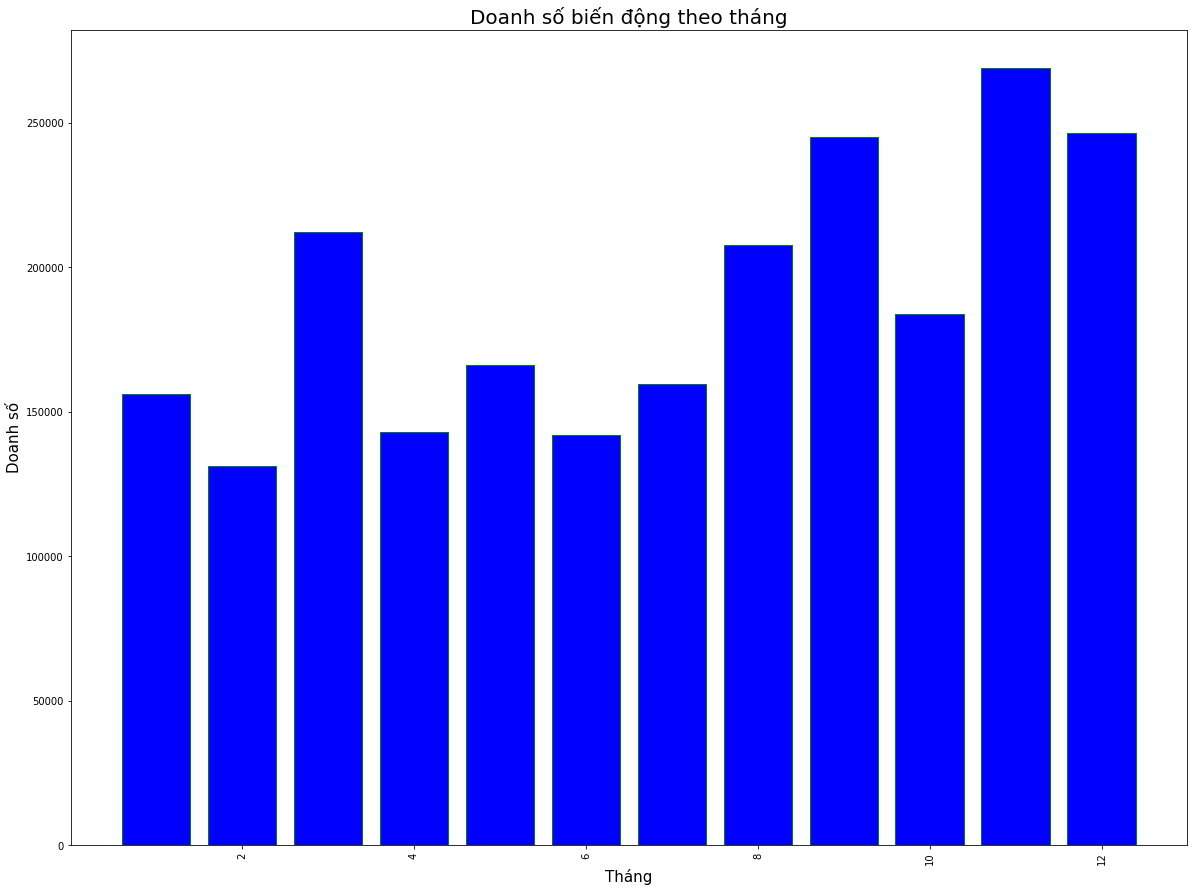

In [111]:
# Biểu đồ thể hiện biến động doanh số theo tháng
plt.figure(figsize=(20,15))
plt.bar(totalsalesofmonth['month'],totalsalesofmonth['Sales'],color='blue',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Doanh số biến động theo tháng', fontsize=20)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Doanh số',fontsize=15)

In [114]:
# Lấy ra doanh số 3 tháng cuối năm 2018
total_sell_prices_3months_df=sell_prices_df[sell_prices_df['year']==2018].loc[:,['month','Sales']].groupby(['month']).sum().sort_values("month",ascending=False).head(3)
# Doanh số trung bình 3 tháng 10,11,12 năm 2018
total_sell_prices_3months_df.mean(axis=0).round(2)

Sales    70152.68
dtype: float64

## Câu hỏi 3: Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

In [115]:
d = {1:'Q1', 2:'Q1',3:'Q1',
     4:'Q2',5:'Q2',6:'Q2',
     7:'Q3',8:'Q3',9:'Q3', 
     10:'Q4',11:'Q4',12:'Q4'}

sell_prices_quater_df = sell_prices_df.groupby(sell_prices_df['month'].map(d).rename('Qtr')).sum().reset_index()
sell_prices_quater_df

,Qtr,Row ID,Sales,day,month,year
0,Q1,9564194,499400.3092,26572,4038,3848101
1,Q2,10603730,451019.7661,34669,10958,4422681
2,Q3,13012736,612229.4475,43281,21504,5322091
3,Q4,14844240,698887.2599,53446,33924,6171024


Text(0, 0.5, 'Doanh số')

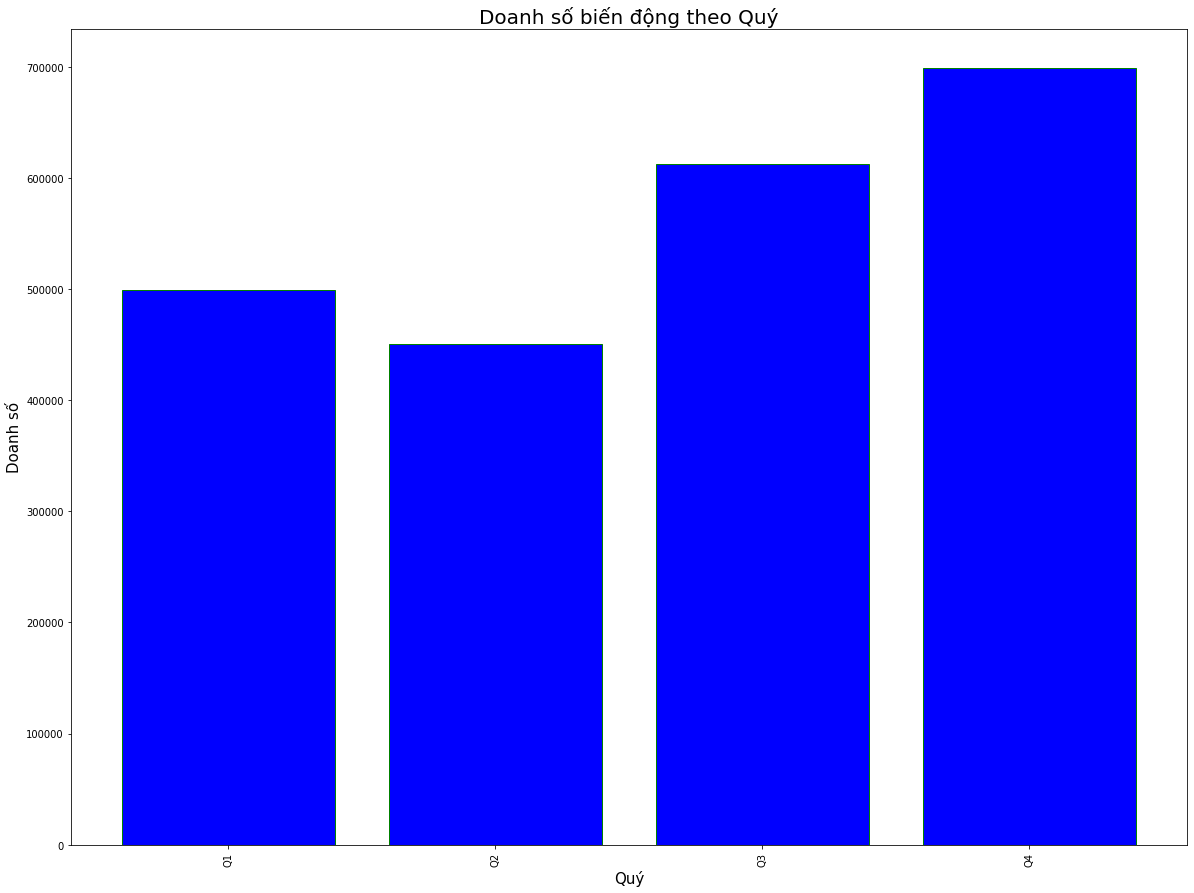

In [119]:
# Biểu đồ thể hiện biến động doanh số theo Quý
plt.figure(figsize=(20,15))
plt.bar(sell_prices_quater_df['Qtr'],sell_prices_quater_df['Sales'],color='blue',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Doanh số biến động theo Quý', fontsize=20)
plt.xlabel('Quý',fontsize=15)
plt.ylabel('Doanh số',fontsize=15)

In [158]:
# Quý có doanh thu cao nhất
sell_prices_quater_df.sort_values('Sales',ascending=False).head(1)

,Qtr,Row ID,Sales,day,month,year
3,Q4,14844240,698887.2599,53446,33924,6171024


## Câu hỏi 4: Tính thời gian giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.